# Analisi dati esplorativa (EDA)

L'analisi esplorativa dei dati (EDA) è un'attività particolarmente importante nella routine di un analista.

Consente una comprensione approfondita del set di dati, definisce o scarta ipotesi e crea modelli predittivi su basi solide.

Utilizza tecniche di manipolazione dei dati e diversi strumenti statistici per descrivere e comprendere la relazione tra le variabili e il modo in cui queste possono influire sul problema che stiamo analizzando.

Ogni analisi dati è diversa, ma il processo generale può essere suddiviso nei seguenti passaggi:

- Importazione di un set di dati

- Comprensione del quadro generale

- Preparazione dei dati

- Comprensione delle variabili

- Studio delle relazioni tra le variabili

- Brainstorming

Vedremo alcune delle caratteristiche più comuni e importanti di Pandas e anche alcune tecniche per manipolare i dati al fine di comprenderli a fondo.

## Import di librerie e dati

Come primo step iniziamo importando le librerie Python di cui avremo bisogno, per poi caricare un dataset che sarà l'oggetto delle nostre analisi. Per questo tutorial utilizzeremo uno dei dataset forniti dalla libreria SciKit-Learn:

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

wine = load_wine() #our data

Per semplicità, in questo esempio useremo Sklearn per importare il dataset relativo al vino. Questo dataset è ampiamente utilizzato nel settore a fini didattici e contiene informazioni sulla composizione chimica dei vini per attività di classificazione. Non useremo un file .csv, ma un dataset presente in Sklearn per creare il dataframe.

In [4]:
# convert the dataset to a pandas dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# create target column
df["target"] = wine.target

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Panoramica generale sui dati

In questa prima fase, il nostro obiettivo è capire cosa stiamo guardando, ma senza entrare nei dettagli. Cerchiamo di comprendere il problema che vogliamo risolvere, riflettendo sull'intero set di dati e sul significato delle variabili.

Questa fase può essere lenta e talvolta anche noiosa, ma ci darà l'opportunità di formarci un'opinione sul nostro set di dati.

Sfrutteremo diverse caratteristiche e proprietà di Pandas per comprendere il quadro generale. Vediamone alcune.

___head()___ e ___tail()___

Due delle funzioni più comunemente utilizzate in Pandas sono _head()_ e _tail()_. Queste due funzioni ci consentono di visualizzare un numero arbitrario di righe (5 per impostazione predefinita) dall'inizio o dalla fine del set di dati. Sono molto utili per accedere rapidamente a una piccola parte del dataframe:

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


Se applichiamo ___shape___ al set di dati, Pandas ci restituisce una coppia di numeri che rappresentano la dimensionalità del nostro set di dati. Questa proprietà è molto utile per comprendere il numero di colonne e la lunghezza del set di dati:

In [9]:
df.shape

(178, 14)

La funzione ___describe()___ fa esattamente quello che dice il suo nome: fornisce informazioni puramente descrittive sul set di dati.

Queste informazioni includono statistiche che riassumono la tendenza centrale della variabile, la loro dispersione, la presenza di valori vuoti e la loro forma:


In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Mentre ___info()___ ci fornisce un riepilogo più breve del nostro set di dati. Ci restituisce informazioni sul tipo di dati, sui valori non nulli e sull'utilizzo della memoria:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## Definire lo scopo

Questa è una domanda importante che dobbiamo sempre porci. Nel nostro caso, vediamo come l'obiettivo sia una variabile categoriale numerica che copre i valori 0, 1 e 2. Questi numeri identificano il tipo di vino.

Se controlliamo la documentazione Sklearn su questo set di dati, vediamo che è stato creato proprio per attività di classificazione. Se volessimo fare modellizzazione, l'idea sarebbe quella di usare le caratteristiche del vino per prevederne il tipo.

In un contesto di pura analisi dei dati, invece, vorremmo studiare come i diversi tipi di vino abbiano caratteristiche diverse e come queste siano distribuite.

In entrambi i casi, il primo passaggio è quello della preparazione dei dati per poterli utilizzare in odo ottimale.

## Preparazione

A questo punto vogliamo iniziare a pulire il nostro set di dati per poter continuare l'analisi. Alcune delle domande che ci porremo sono

- Ci sono variabili inutili o ridondanti?

- Ci sono colonne duplicate?

- La nomenclatura ha senso?

- Ci sono nuove variabili che vogliamo creare?

Vediamo come applicare queste idee al nostro set di dati.

Tutte le variabili sembrano essere misure fisico-chimiche. Ciò significa che potrebbero essere tutte utili pere aiutare a definire la segmentazione del tipo di vino. Non abbiamo motivo di rimuovere le colonne a priori.

Per verificare la presenza di righe duplicate possiamo usare ___duplicated().sum()___

Questo ci mostrerà il numero di righe duplicate nel nostro set di dati:

In [15]:
df.duplicated().sum()

np.int64(0)

Il risultato è 0, quindi non abbiamo righe duplicate da rimuovere.

Un'altro step che possiamo effettuare è quello di rinominare alcune colonne per rendere più chiaro quale informazione contengono.

Ad esempio la colonna _"od280/od315_of_diluted_wines"_ è il rapporto di due letture spettrofotometriche che rappresenta la concentrazione di proteine. Quindi chiamare quella colonna _"protein_concentration"_ ci aiuta a lavorarci e rende la visualizzazione dei dati più chiara:

In [18]:
df.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,protein_concentration,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Trattandosi di un dataset prodotto appositamente per la pratica, è praticamente già pronto. Tuttavia è bene tenere a mente gli step di pulizia e preparazione che abbiamo visto fin'ora, poiché sono indispensabili quando si lavora con dei casi reali.

## Capire le variabili

Mentre nel punto precedente abbiamo descritto il dataset nella sua interezza, ora cercheremo di descrivere accuratamente tutte le variabili che ci interessano. Per questo motivo, questo passaggio può anche essere definito analisi univariata.

### Variabili categoriche

In questo contesto, ___value_counts()___ è una delle funzioni più importanti per capire quanti valori di una data variabile sono presenti nel nostro dataset. Prendiamo ad esempio la variabile _target_ e vediamo quanti dati sono presenti per ogni categoria di vino, prima in valore assoluto e poi come percentuale:

In [19]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [20]:
df.target.value_counts(normalize=True)

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

E per avere una visualizzazione grafica delle varie categorie, possiamo usare le funzioni di _plotting_ disponibili direttamente sul DataFrame:

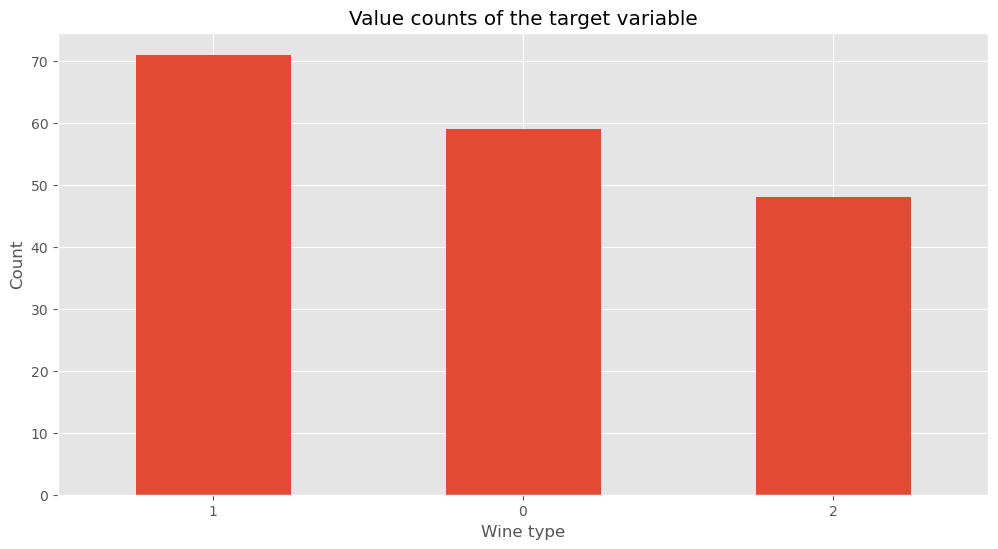

In [24]:
df.target.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Wine type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

_valuecounts()_ può essere utilizzata con qualsiasi variabile, ma funziona meglio con variabili categoriche come il nostro target.

Questa funzione ci informa anche sul grado di equilibrio delle classi all'interno del set di dati.

In questo caso, la classe 2 appare meno delle altre due classi: nella fase di modellazione potremmo implementare tecniche di bilanciamento dei dati per non confondere il nostro modello. Ad esempio, supponendo di avere un dataset più grande, potremmo campionare i dati per l'addestramento del modello in modo che i dati siano bilanciati per tutte le categorie.

### Variabili numeriche

Se invece vogliamo analizzare una variabile numerica, possiamo descriverne la distribuzione con ___describe()___, come abbiamo visto in precedenza, e visualizzarla con ___hist()___.

Prendiamo ad esempio la variabile _"magnesium"_:

In [25]:
df.magnesium.describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

<Axes: ylabel='Frequency'>

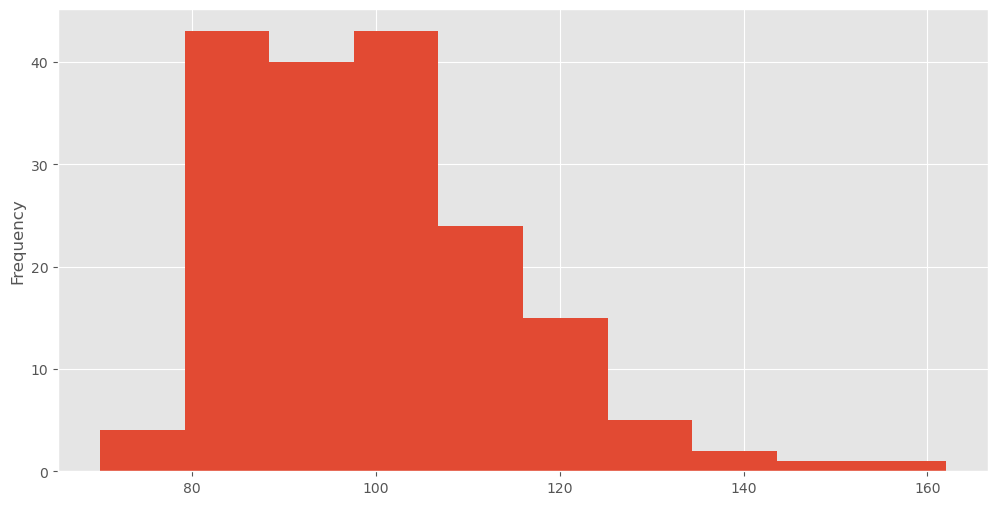

In [26]:
df.magnesium.plot(kind='hist')

Utilizzando invece Seaborn, possiamo avere anche un'approssimazione dell'andamento della distribuzione:

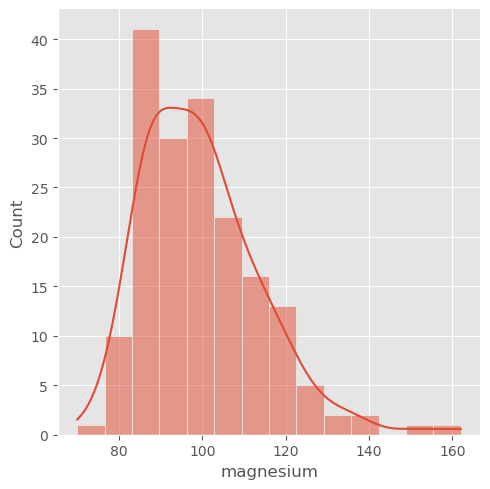

In [27]:
sns.displot(data=df, x="magnesium", kde=True)
plt.show()

E anche ottenere le distribuzioni attraverso le diverse categorie di vino:

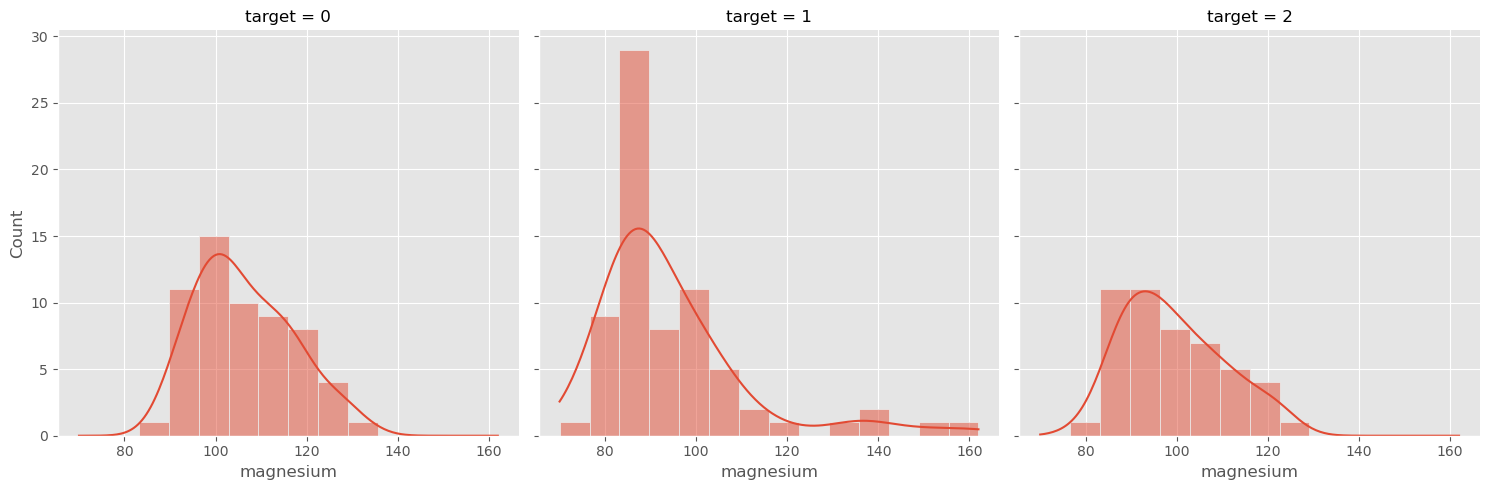

In [29]:
sns.displot(data=df, x="magnesium", col="target", kde=True)
plt.show()

Quali informazioni possiamo ricavare da questa variabile?

Possiamo vedere ad esempio che non segue una distribuzione normale, tende ad avere un picco in corrispondenza dei valori più bassi, per poi diminuire gradualmente sui valori più alti. Non sembra essere troppo diversa per i diversi tipi di vino, quindi potrebbe non essere estremamente utile per la nostra classificazione.

Facendo questo per ogni variabile, avremo un quadro descrittivo pseudo-completo del loro comportamento.

Questo lavoro è necessario per comprendere appieno ogni variabile e permettere lo studio della relazione tra di esse.

## Relazioni tra variabili

Ora l'idea è quella di trovare relazioni interessanti che mostrino l'influenza di una variabile sull'altra, preferibilmente sul target.

Questo lavoro sblocca le prime opzioni di intelligence: in un contesto aziendale come il marketing digitale o la pubblicità online, queste informazioni offrono valore e la possibilità di agire in modo strategico.

Possiamo iniziare a esplorare le relazioni con l'aiuto di __Seaborn__ e ___pairplot()___:

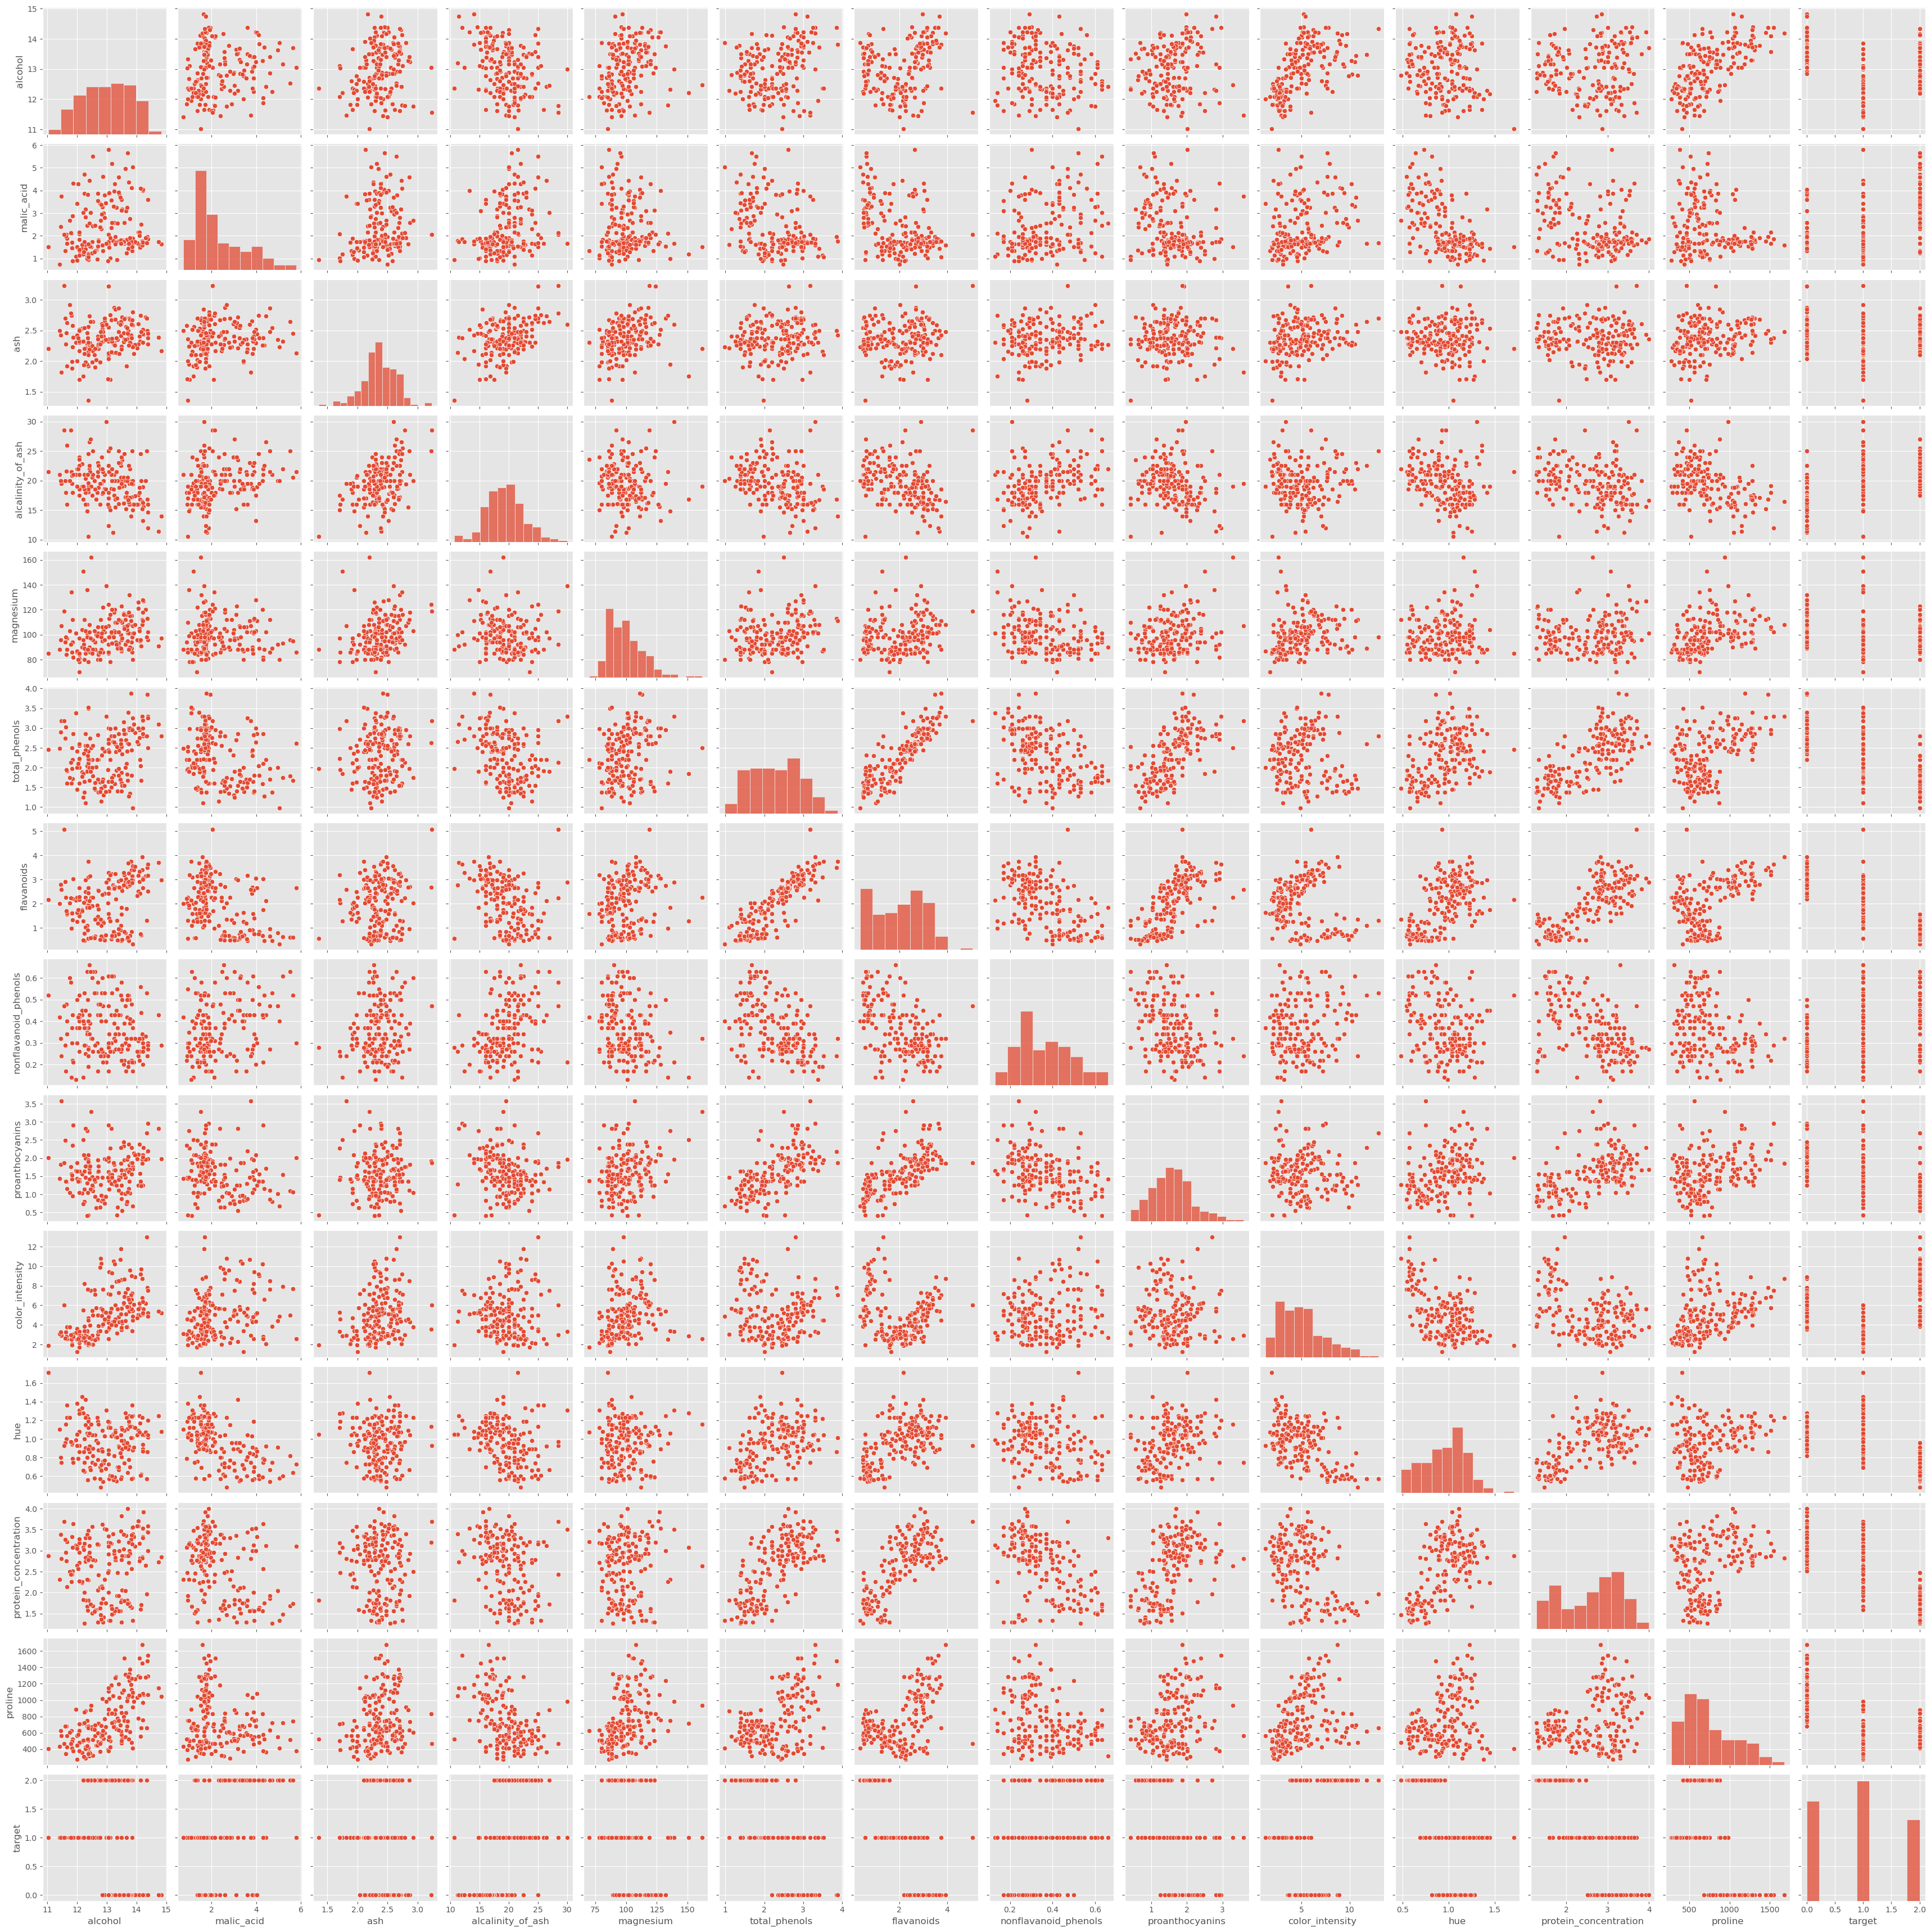

In [31]:
sns.pairplot(df)
plt.show()

Come abbiamo già visto, _pairplot()_ ci fornisce la relazione tra ciascuna coppia di variabili utilizzando uno scatterplot, mentre lungo la diagonale ci dà la distribuzione di ogni singola variabile (o i conteggi, nel caso di variabili categoriche).

Questo ci dà una prima visualizzazione delle possibili relazioni tra variabili. Siccome quello che ci interessa è la relazione tra i valori fisico-chimici del vino (variabili numeriche) e il target (una variabile categorica), passiamo alla produzione di _Box Plot_ per mostrare queste correlazioni.

Utilizziamo in prima battuta i valori di prolina e flavonoidi, che sembrano distribuirsi in modo diverso per le diverse categorie di vino:

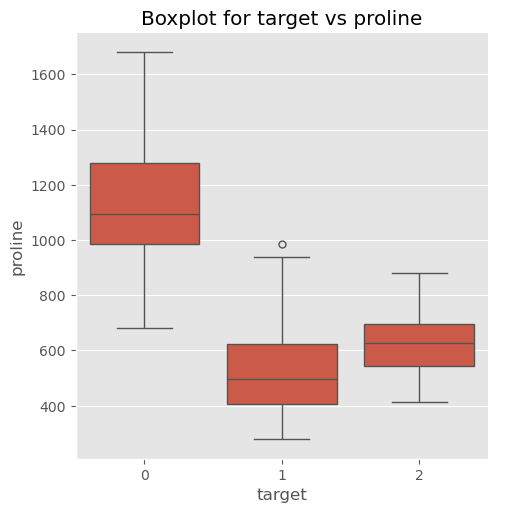

In [33]:
sns.catplot(x="target", y="proline", data=df, kind="box")
plt.title("Boxplot for target vs proline")
plt.show()

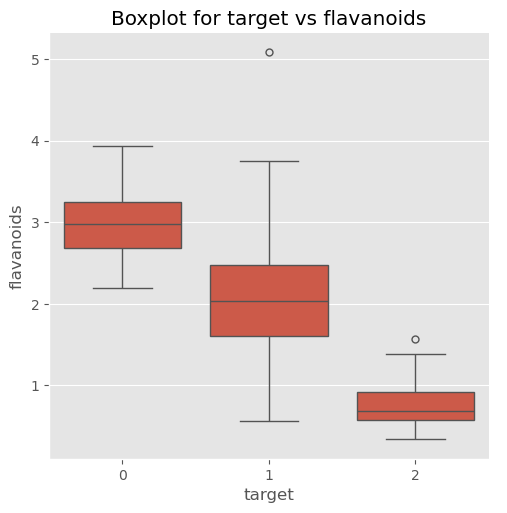

In [35]:
sns.catplot(x="target", y="flavanoids", data=df, kind="box")
plt.title("Boxplot for target vs flavanoids")
plt.show()

In entrambi i casi, il vino di tipo 0 sembra avere valori più elevati rispetto agli altri due. È possibile che i vini di tipo 0 abbiano livelli combinati più elevati di prolina e flavonoidi? Con Seaborn possiamo creare un grafico a dispersione e visualizzare a quale classe di vino appartiene un punto.

Basta specificare il parametro _hue_:

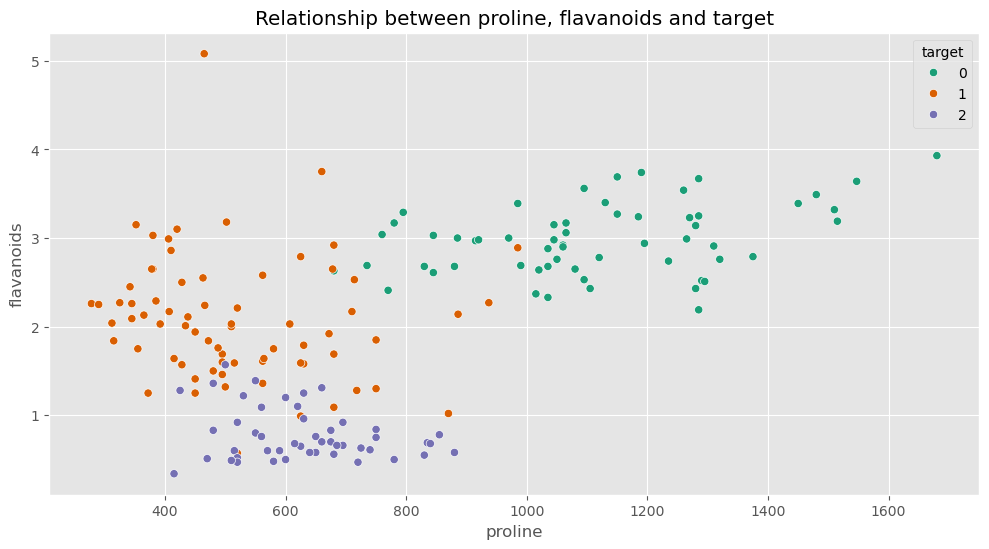

In [37]:
sns.scatterplot(x="proline", y="flavanoids", hue="target", data=df, palette="Dark2")
plt.title("Relationship between proline, flavanoids and target")
plt.show()

## Conclusioni

Ci sono altre 1000 domande che ci saremmo potuti fare su questi dati. Avremmo potuto esplorare altre variabili e le relazioni tra esse, vedere se queste portavano alla formazione di cluster per quanto riguarda la tipologia di vino (il nostro _target_). Però, per riassumere, ci sono degli step che possiamo seguire come linee guida ogni volta che ci troviamo di fronte ad un'analisi dati esplorativa:

1. Ottenere i dati;

2. Ottenere una panoramica sui dati, sul loro numero, il loro tipo, sui valori nulli ed eventuali duplicati;

3. Procedere ad una pulizia dei dati, eliminando i valori duplicati e gestendo i valori nulli;

4. Produrre grafici che mostrino le distribuzioni delle singole variabili (analisi univariata);

5. Studiare le relazioni tra le diverse variabili (analisi bi-variata o multivariata);

Successivamente possiamo procedere 